<a href="https://colab.research.google.com/github/Chutki319239/msazure/blob/main/CNN_IMAGE_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image classification using CNN (CIFAR10 dataset)**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , models , layers
import matplotlib.pyplot as plt
import numpy as np


## **Load the Dataset**

In [2]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()
X_train.shape


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

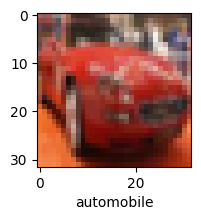

In [8]:
plot_sample(X_train,y_train,5)

## **Normalizing the training data**

In [9]:
X_train=X_train/255
X_test=X_test/255

## **Build simple artificial neural network for image classification**

In [10]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
    ])
ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.2996 - loss: 1.9422
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 81ms/step - accuracy: 0.4173 - loss: 1.6488
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 82ms/step - accuracy: 0.4515 - loss: 1.5573
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.4739 - loss: 1.4925
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 158s 92ms/step - accuracy: 0.4962 - loss: 1.4344


In [11]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.4839 - loss: 1.4641


[1.4695043563842773, 0.4814000129699707]

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element)for element in y_pred]
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.52      0.52      1000
           1       0.57      0.66      0.61      1000
           2       0.38      0.39      0.38      1000
           3       0.36      0.33      0.35      1000
           4       0.55      0.26      0.35      1000
           5       0.46      0.28      0.35      1000
           6       0.54      0.52      0.53      1000
           7       0.55      0.52      0.53      1000
           8       0.46      0.75      0.57      1000
           9       0.46      0.59      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



## **Convolutional neural network to train our images**

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.3819 - loss: 1.7048
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5997 - loss: 1.1381
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.6541 - loss: 0.9891
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6890 - loss: 0.8918
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7086 - loss: 0.8315
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7309 - loss: 0.7626
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7523 - loss: 0.7111
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.7658 - loss: 0.6702
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7792 - loss: 0.6338
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7935 - loss: 0.5848


In [22]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6982 - loss: 0.9262


[0.9381408095359802, 0.6983000040054321]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


array([[4.5191182e-04, 5.8147884e-06, 4.5171508e-04, 4.9927691e-01,
        3.0152602e-04, 4.9767998e-01, 6.6169148e-04, 8.3198567e-05,
        1.0528996e-03, 3.4421679e-05],
       [6.7242393e-03, 3.5160061e-02, 5.1475138e-07, 1.5885919e-07,
        1.9402521e-06, 2.1629639e-08, 8.1229167e-08, 8.0941497e-08,
        9.5735598e-01, 7.5682974e-04],
       [5.6883354e-02, 3.8840628e-01, 1.1370103e-03, 3.8943978e-03,
        2.7792670e-03, 1.0131221e-03, 5.0017220e-04, 2.5352919e-03,
        3.2595968e-01, 2.1689145e-01],
       [8.5440826e-01, 2.2505336e-02, 8.3974516e-03, 6.8671834e-03,
        5.3243763e-03, 1.1262302e-04, 4.1718018e-04, 1.0513094e-03,
        1.0067711e-01, 2.3913388e-04],
       [1.0444566e-05, 1.6161149e-04, 1.7959021e-01, 1.0935071e-01,
        2.9604310e-01, 6.2046930e-02, 3.5254216e-01, 1.3749368e-04,
        1.1258927e-04, 4.6301539e-06]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [25]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

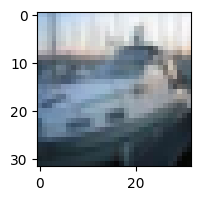

In [33]:
plot_sample(X_test, y_test,2)

In [31]:
classes[y_classes[6]]

'automobile'

In [32]:
classes[y_classes[8]]

'cat'